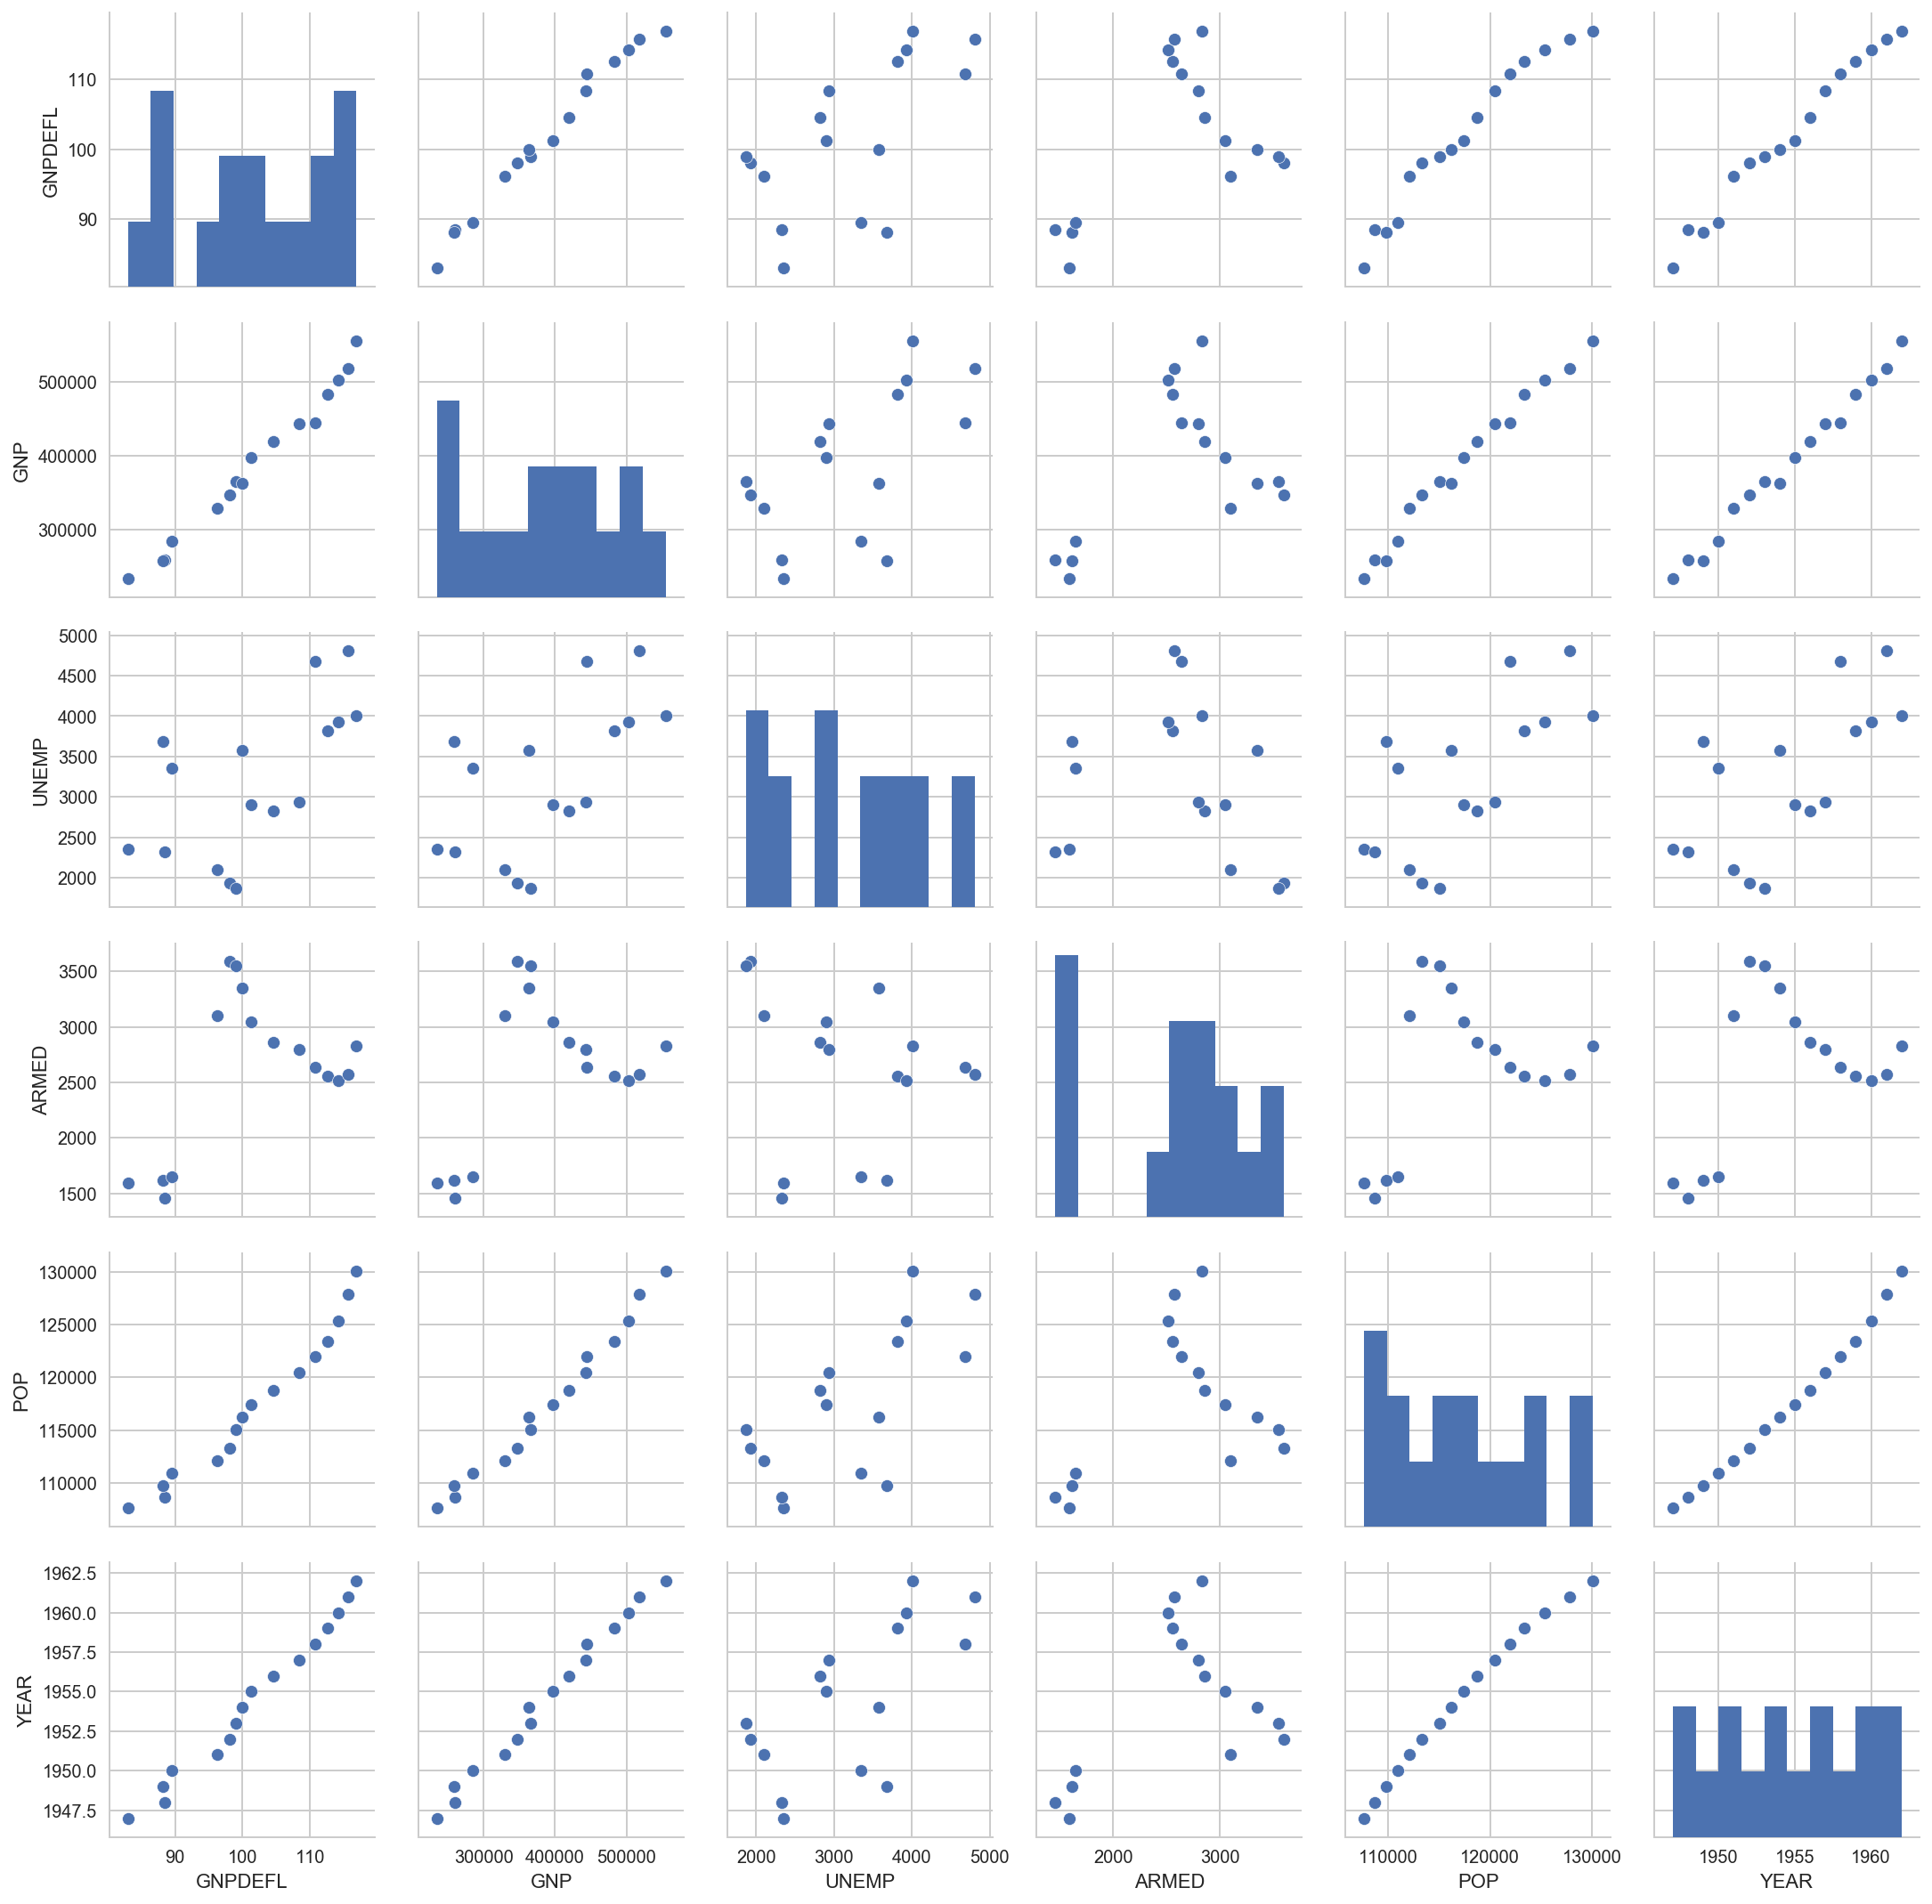

In [16]:
from statsmodels.datasets.longley import load_pandas
dfy = load_pandas().endog
dfX0 = load_pandas().exog
df = pd.concat([dfy, dfX0], axis=1)
sns.pairplot(dfX0)
plt.show()

In [17]:
dfX0.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


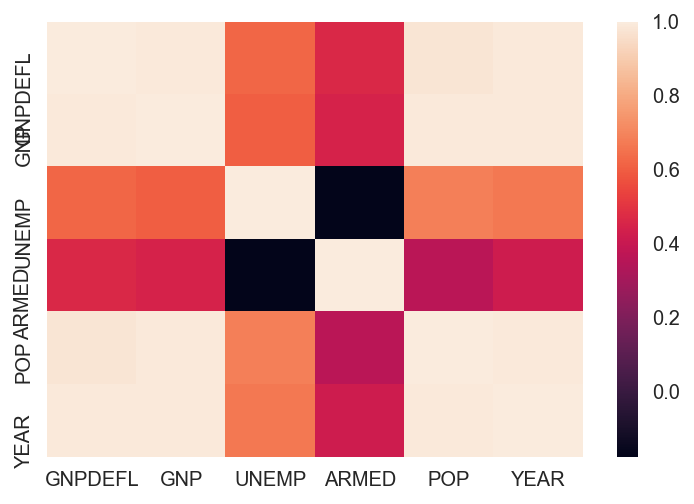

In [18]:
sns.heatmap(dfX0.corr())
plt.show()

In [19]:
df.tail()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
11,66513.0,110.8,444546.0,4681.0,2637.0,121950.0,1958.0
12,68655.0,112.6,482704.0,3813.0,2552.0,123366.0,1959.0
13,69564.0,114.2,502601.0,3931.0,2514.0,125368.0,1960.0
14,69331.0,115.7,518173.0,4806.0,2572.0,127852.0,1961.0
15,70551.0,116.9,554894.0,4007.0,2827.0,130081.0,1962.0


In [20]:
model = sm.OLS.from_formula("TOTEMP ~ "
                            "scale(GNPDEFL) + scale(POP) + scale(GNP) + "
                            "scale(YEAR) + scale(ARMED) + scale(UNEMP)", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           4.98e-10
Time:                        15:05:44   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.532e+04     76.214    857.

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [22]:
dfX0["GNPDEFL"].var()

116.45762500000001

In [83]:
mean =dfX0["GNPDEFL"].mean()
((dfX0["GNPDEFL"] - mean)**2).sum() / (len(dfX0)-1) 

116.45762500000001

In [84]:
sm.OLS?

# vif 구하기 

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [80]:
def get_rsq():
    ls = []
    for col in dfX0.columns:
        cols = list(dfX0.columns)
        cols.remove(col)

        strform = col + "~" + "+".join(cols) +" + 0"

        model = sm.OLS.from_formula(strform, data=dfX0)
        result = model.fit()
        
        vif = 1./(1.-result.rsquared)
        
        print(strform, vif)
get_rsq()

GNPDEFL~GNP+UNEMP+ARMED+POP+YEAR + 0 12425.514335354637
GNP~GNPDEFL+UNEMP+ARMED+POP+YEAR + 0 10290.435436791722
UNEMP~GNPDEFL+GNP+ARMED+POP+YEAR + 0 136.22435356291453
ARMED~GNPDEFL+GNP+UNEMP+POP+YEAR + 0 39.9833855829122
POP~GNPDEFL+GNP+UNEMP+ARMED+YEAR + 0 101193.16199321792
YEAR~GNPDEFL+GNP+UNEMP+ARMED+POP + 0 84709.9504430369


In [81]:
def get_rsq():
    ls = []
    for col in dfX0.columns:
        cols = list(dfX0.columns)
        cols.remove(col)

        y = dfX0[col]
        x = dfX0.drop(columns=col)

        model = sm.OLS(y, x)
        result = model.fit()
        
        vif = 1./(1.-result.rsquared)
        
        print( vif)
get_rsq()

12425.514335354637
10290.435436791722
136.2243535629104
39.9833855829122
101193.16199321792
84709.9504430369


In [82]:
def clac_vif1(exog, exog_idx):
    k_vars = exog.shape[1]
    x_i = exog[:, exog_idx]
    mask = np.arange(k_vars) != exog_idx
    x_noti = exog[:, mask]
    r_squared_i = sm.OLS(x_i, x_noti).fit().rsquared
    vif = 1. / (1. - r_squared_i)
    return vif
clac_vif1(dfX0.values, 0)

12425.514335354637